In [1]:
# Step 1
import pandas as pd
import os
import copy

csv_path = os.getenv("HOME") + "/aiffel/bike-sharing-demand/data/bike-sharing-demand/train.csv"
raw_data = pd.read_csv(csv_path)
copy_data = copy.deepcopy(raw_data)

In [2]:
copy_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Step 2
print(copy_data["datetime"].dtypes)
#copy_data["datetime"] = pd.to_datetime(copy_data["datetime"])
copy_data['year'] = pd.DatetimeIndex(copy_data['datetime']).year
copy_data['month'] = pd.DatetimeIndex(copy_data['datetime']).month
copy_data['day'] = pd.DatetimeIndex(copy_data['datetime']).day
copy_data['hour'] = pd.DatetimeIndex(copy_data['datetime']).hour
copy_data['minute'] = pd.DatetimeIndex(copy_data['datetime']).minute
copy_data['second'] = pd.DatetimeIndex(copy_data['datetime']).second

copy_data.head()

object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [4]:
# Step 3
import seaborn as sns

In [5]:
# Step 4
X = copy_data[['year', 'month', 'hour', 'temp', 'humidity', 'windspeed']].values
y = copy_data['count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Step 6
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
print("MSE:", mse, "\nRMSE:", rmse)

MSE: 19973.323410782166 
RMSE: 141.3270087802829


1st figure: temp vs count
2nd figure: humidity vs count


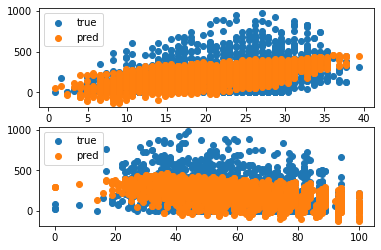

In [44]:
# Step 7
import matplotlib.pyplot as plt

print("1st figure: temp vs count")
print("2nd figure: humidity vs count")
plt.subplot(2,1,1)
plt.scatter(X_test[:,3], y_test, label="true")
plt.scatter(X_test[:,3], pred, label="pred")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(X_test[:,4], y_test, label="true")
plt.scatter(X_test[:,4], pred, label="pred")
plt.legend()
plt.show()